In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [2]:
##### GENERAL INFO ########

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
####### EDA ########

C:\Users\stani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class distribution')

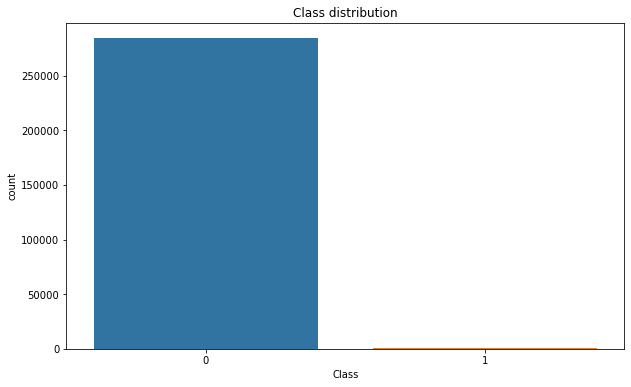

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(df['Class'], )
plt.title('Class distribution')

In [8]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class']==0]

In [9]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
non_fraud['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

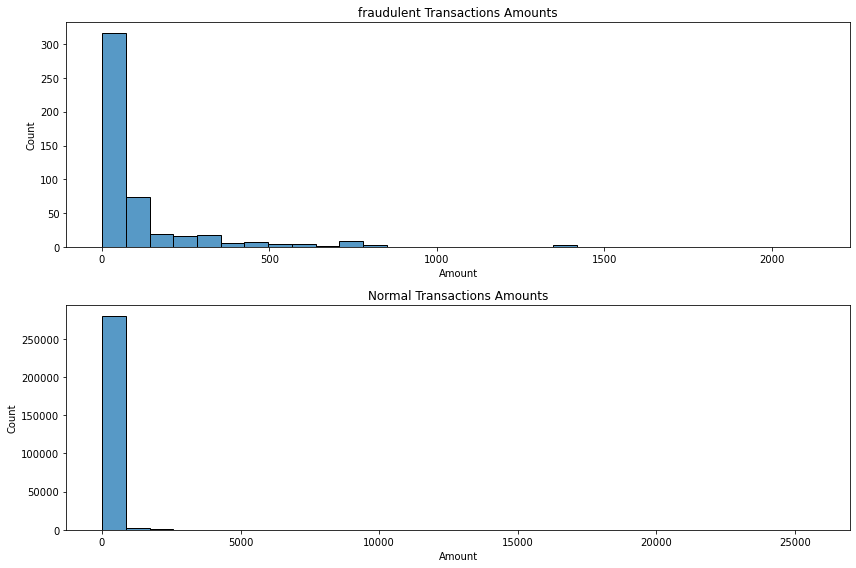

In [11]:
fig=plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.title("fraudulent Transactions Amounts")
sns.histplot(fraud['Amount'], bins=30)


plt.subplot(2,1,2)
plt.title('Normal Transactions Amounts')
sns.histplot(non_fraud['Amount'], bins=30)


plt.tight_layout()

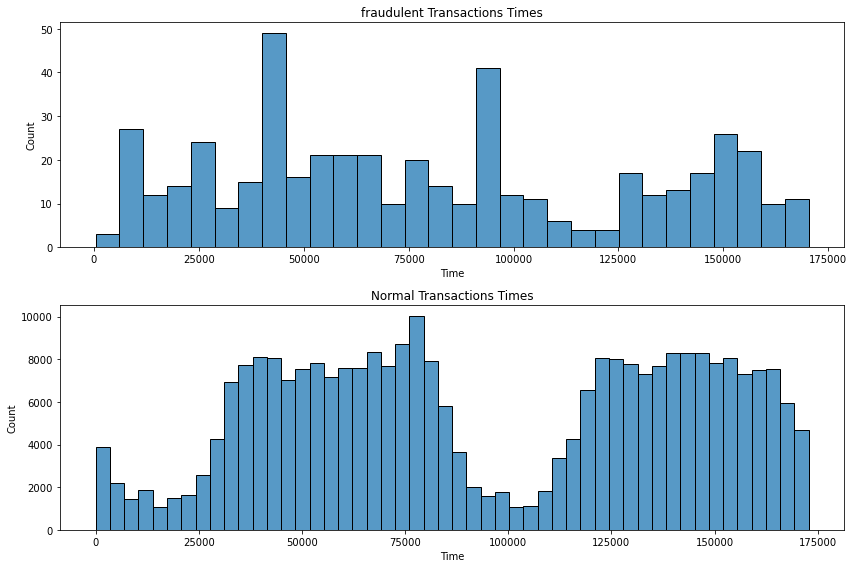

In [12]:
fig=plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.title("fraudulent Transactions Times")
sns.histplot(fraud['Time'], bins=30)


plt.subplot(2,1,2)
plt.title('Normal Transactions Times')
sns.histplot(non_fraud['Time'], bins=50)


plt.tight_layout()

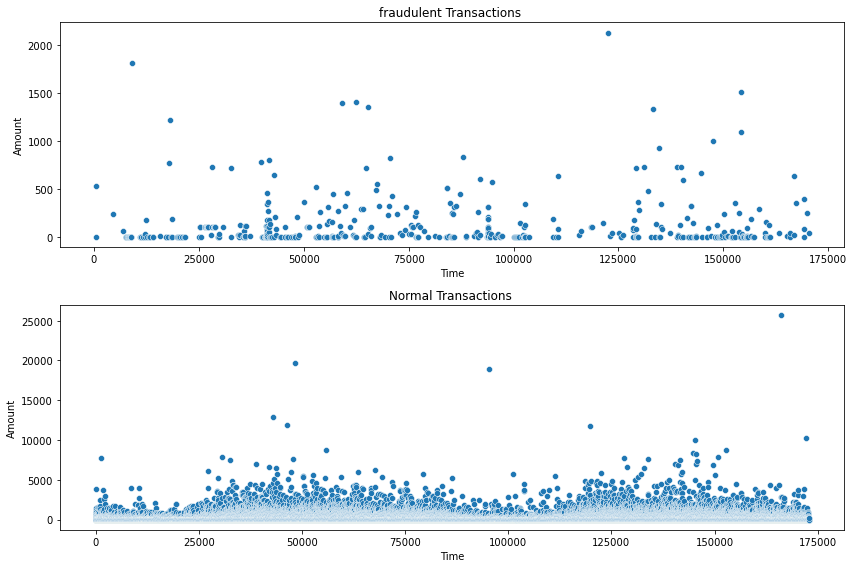

In [13]:
fig=plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.title("fraudulent Transactions ")
sns.scatterplot(y='Amount', x='Time', data=fraud)

plt.subplot(2,1,2)
plt.title('Normal Transactions ')
sns.scatterplot(y='Amount', x='Time', data=non_fraud)


plt.tight_layout()

In [14]:
## SCALING ###
#scaling amount and time features, as pca varieblas had been scaled.

In [5]:
#scaling amount

scaler = StandardScaler()
df['Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [6]:
#scaling time

scaler = RobustScaler()
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

In [21]:
### simple splitting ###

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
classifiers = {
    'LogisticRegression' : LogisticRegression(random_state=0),
    'RandomForest': RandomForestClassifier(random_state=0)
}

LR_grid = {'penalty': ['l1', 'l2'],
          'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
          'max_iter': [50, 100, 150]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
          'max_depth': [4, 6, 8, 10, 12]},

grid = {
    "LogisticRegression" : LR_grid,  
    "RandomForest" : RF_grid}

In [30]:
i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifier': classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)
    
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_test, y_test)
    
    clf_best_params[key]=clf.best_params_
    
    print('Model', key)
    i+=1

C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\stani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

Model LogisticRegression
Model RandomForest


In [31]:
valid_scores

,Classifier,Validation accuracy
0,LogisticRegression,0.999255
1,RandomForest,0.999585


In [32]:
clf_best_params['RandomForest']

{'max_depth': 12, 'n_estimators': 100}

In [ ]:
model = RandomForestClassifier(max_depth=12, n_estimators=100)

In [10]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12)

In [12]:
predictions = model.predict(X_test)

In [13]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.95      0.81      0.88       149

    accuracy                           1.00     93987
   macro avg       0.98      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987

[[93832     6]
 [   28   121]]


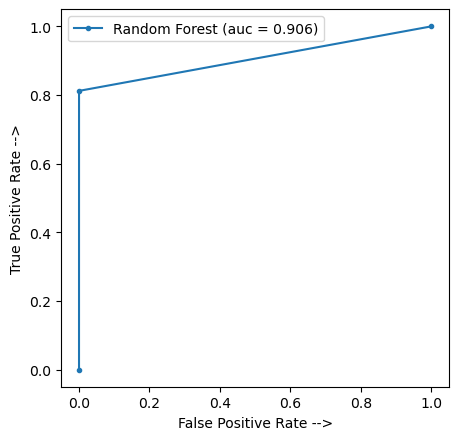

In [14]:
randomf_fpr, randomf_tpr, threshold = roc_curve(y_test, predictions)
auc_randomf = auc(randomf_fpr, randomf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(randomf_fpr, randomf_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_randomf)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()